# <font color='magenta'>Neural Network </font>

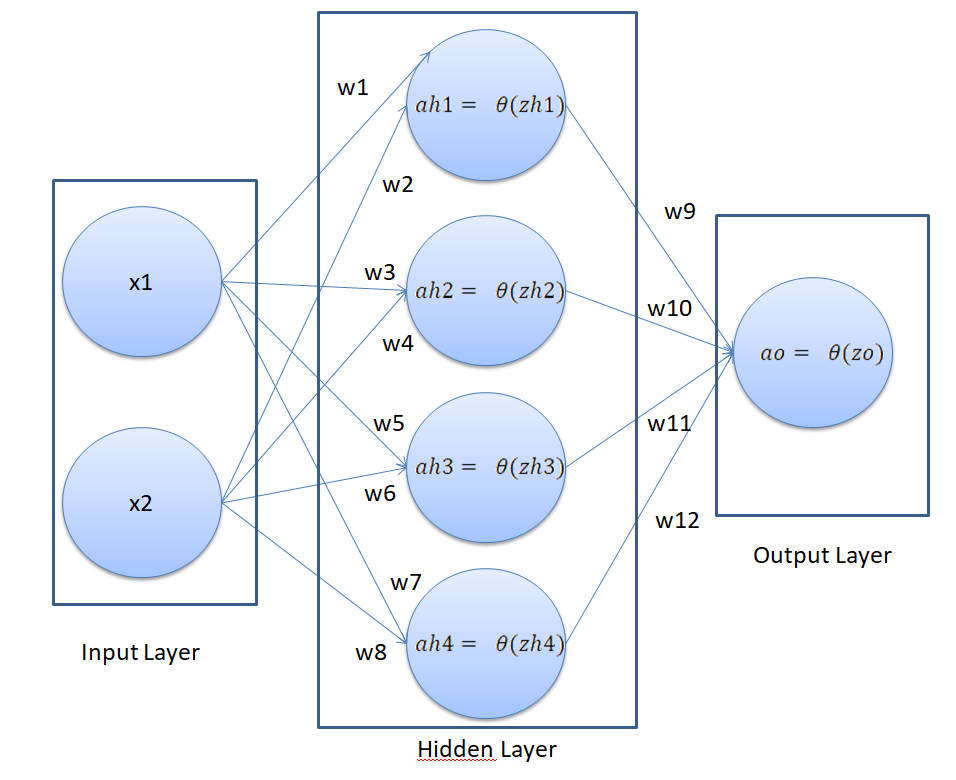


In [1]:
## Loading data and importing libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import datasets

In [2]:
class SLP():
    def __init__(self,epochs,lr):
        self.learning_rate = lr
        self.epochs=epochs
    def sigmoid(self,x):
        return 1/(1+np.exp(-x)) 
    def der_sigmoid(self,x):
        return self.sigmoid(x)*(1-self.sigmoid(x))
    
    def fit(self,features,labels):
        weights_layer1 = np.random.rand(features.shape[1],features.shape[1]*4) # weight's shape (2,4) for moons data case because we have 2 features 
        weights_layer2 = np.random.rand(features.shape[1]*4,1) # weights for hidden layer to output layer
        for i in range(self.epochs):
            ls=[]
             # feedforward
            zh = np.dot(features, weights_layer1)
            ah = self.sigmoid(zh)
            zo = np.dot(ah, weights_layer2)

            ao = self.sigmoid(zo)  
            
            ls.append(ao)
            # backward propagation
            labels = labels.reshape(-1,1)
            # Phase 1 # Updating weights of layer 2 (hidden layer to output layer)
            error_out = ((1 / 2) * (np.power((ao - labels), 2)))
            dcost_dao = 2*(ao - labels) # derivative of cost wrt ao
            dao_dzo = self.der_sigmoid(zo) # derivative of ao wrt to zo
            dzo_dwo = ah # derivative of zo wrt wo

            dcost_weight_output_layer = np.dot(dzo_dwo.T, dcost_dao * dao_dzo)

            # Phase 2 # Updating weights of layer 2 (input layer to hidden layer )
            # dcost_w1 = dcost_dah * dah_dzh * dzh_dw1 # for 1 particular weight
            # dcost_dah = dcost_dzo * dzo_dah 
            dcost_dzo = dcost_dao * dao_dzo
            dzo_dah = weights_layer2
            dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
            dah_dzh = self.der_sigmoid(zh) 
            dzh_dwh = features
            dcost_weight_hidden_layer = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)
            # weigths update time
            weights_layer1 -= self.learning_rate * dcost_weight_hidden_layer

            weights_layer2 -= self.learning_rate * dcost_weight_output_layer 
            
        return ls



In [3]:
s =SLP(2000,0.9)
features,target = datasets.make_moons(100, noise=0.25)
prediction=s.fit(features,target)
prediction

[array([[2.33918385e-06],
        [3.40701786e-07],
        [3.96847059e-06],
        [4.96982492e-06],
        [1.60562319e-06],
        [3.24528028e-09],
        [1.96857323e-05],
        [4.09521161e-09],
        [3.19974785e-06],
        [3.61660184e-07],
        [3.18001980e-08],
        [3.39973053e-08],
        [8.56829809e-07],
        [5.73095594e-08],
        [1.21176418e-08],
        [3.19569057e-06],
        [5.15215328e-09],
        [7.02029374e-07],
        [8.10964990e-06],
        [9.20508488e-08],
        [2.61263603e-08],
        [1.45991846e-06],
        [2.92519571e-09],
        [3.52049664e-09],
        [6.66167127e-05],
        [5.75896074e-09],
        [9.67125661e-08],
        [1.81761602e-06],
        [2.78555724e-08],
        [6.56969627e-07],
        [6.90618949e-10],
        [2.33966410e-07],
        [2.52940441e-05],
        [1.48907090e-06],
        [1.63684812e-08],
        [3.06140696e-07],
        [4.76620615e-07],
        [1.11079851e-08],
        [4.1